### Project and data are based on a free, online course of machine learning https://www.coursera.org/learn/machine-learning. I wholeheartedly recommend this! 

## I will show how do it in Python:
    + apply k-means and pca algorithms.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rnd
from matplotlib.pyplot import cm
from matplotlib import image
import time
import scipy.io
import warnings
import sys


# ignore warnings
warnings.filterwarnings('ignore')

# write packages and python version to file
'''
! python -m pip list > packages_versions.txt
# a append to file
with open('packages_versions.txt', 'a') as f:
    f.write('Python version ' + str(sys.version))
''';

In [2]:
def k_means(X, cluster_num, max_iter, *args, fig = None):
    def find_closest_centroid(X, centroids):
        temp = np.array([[np.linalg.norm(point - c) for c in centroids] for point in X])
        ind = np.argmin(temp, axis = 1)
        return ind[np.newaxis].T
       
    def compute_centroids(X, ind):
        X = np.concatenate((X, ind), axis = 1)
        X_df = pd.DataFrame(X)
        kn = X.shape[1]
        rename_dict = {i : 'x{}'.format(i) for i in range(kn-1)}
        rename_dict[kn-1] = 'centroid'
        X_df = X_df.rename(columns=rename_dict)
        return np.array(X_df.pivot_table(X_df, 'centroid', aggfunc=np.mean))
    
    all_centroids = []
    x_shape = X.shape[1]
    if len(args):
        centroids = args[0]
        all_centroids = centroids.tolist()
    else:
        cluster_ind = [i for i in range(X.shape[0])]
        rnd.shuffle(cluster_ind)
        centroids = X[cluster_ind[:cluster_num]]
    for i in range(max_iter):
        print('{} iteration'.format(i+1))
        idx = find_closest_centroid(X, centroids)
        centroids = compute_centroids(X, idx)
        all_centroids.extend(centroids.tolist())

        if fig:
            ax = fig.gca()
            
            plot_ntypes(fig, 'l1', 'l2', idx, X)
            ax.scatter(*zip(*all_centroids), c = 'y', marker = '+')
            for i in range(cluster_num):   
                ax.plot(*zip(*all_centroids[i::3]), color = 'k')
            fig.canvas.draw()
            time.sleep(1)  
    
    return centroids, idx
   
def plot_ntypes(fig, l1, l2, category, X):
    '''
    Plots n types on 2d plane.
    '''
    temp_len = len(set(category.flat))
    X_cat = [[] for i in range(temp_len)]
   
    for x, cat in zip(X, category):
        X_cat[cat].append(x.tolist())
            
    ax = fig.gca() # get current axis    
    color=cm.rainbow(np.linspace(0,1,temp_len))
    for x, c in zip(X_cat, color):    
        ax.scatter(*zip(*x), c=c)
    
    return ax

def pca(X):
    m = X.shape[0]
    sigma = X.T @ X / m
    u, s, v = np.linalg.svd(X)
    return u, s, v.T

def feature_normalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0, ddof = 1)
    return (X - mu)/sigma, mu, sigma

def project_data(X, v, k):
    '''
    Project data to k dimentions.
    '''
    v_reduce = v[:, :k]
    Z = X @ v_reduce
    return Z

def recover_data(Z, v, k):
    '''
    Recover projected data. Loss data information can be occured.
    '''
    v_reduce = v[:, :k]
    X = Z @ v_reduce.T
    return X
  
def plot_pics(X, size, pics):
    z = np.ones((pics*size + size - 1, pics*size + size - 1))
    choosed = [i for i in range(size ** 2)]
    for no_pic in range(size ** 2):
        pic = X[choosed[no_pic]]
        x, y = divmod(no_pic, size)
        for i in range(pics ** 2):
            d, r = divmod(i,pics)
            z[r + pics*x + x][d + pics*y + y] = pic[i]
    if size == 1:
        return z, choosed[0]
    else:
        return z
    

<IPython.core.display.Javascript object>


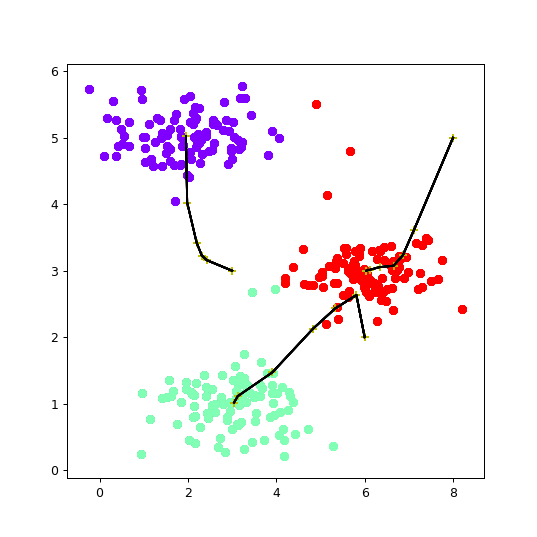

1 iteration
2 iteration
3 iteration
4 iteration
5 iteration
6 iteration
7 iteration
8 iteration
9 iteration
10 iteration


In [3]:
data = scipy.io.loadmat('ex7data2')
X = data['X']

fig = plt.figure(figsize= (6,6))
centroids = np.array([[3, 3], [6, 2], [8, 5]])

# visualization of k-means algorytm
cat = k_means(X, 3, 10, centroids, fig = fig)[1]

1 iteration
2 iteration
3 iteration
4 iteration
5 iteration
6 iteration
7 iteration
8 iteration
9 iteration
10 iteration


<IPython.core.display.Javascript object>


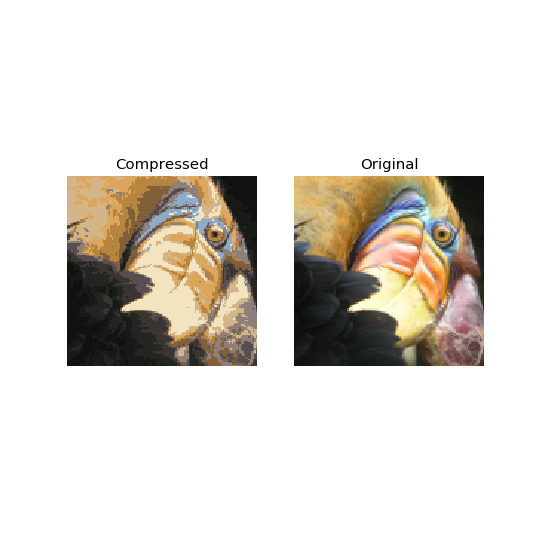

In [4]:
image = plt.imread('bird_small.png')
original_im = image
image = image/255
shape = image.shape
image = image.reshape(-1, image.shape[-1])
# Reduce a number of colors
color_num = 12
max_iter = 10

image_compress = k_means(image, color_num, max_iter)
centroids, idx = image_compress
im = centroids[idx]
im = im.reshape(shape)
im = 255 * im

fig = plt.figure(figsize=(6,6))
ax1=plt.subplot(1, 2, 1)
ax1.imshow(im)
ax1.set_title('Compressed')
ax1.axis('off')
ax2=plt.subplot(1, 2, 2)
ax2.imshow(original_im)
ax2.axis('off')
ax2.set_title('Original');


In [5]:
data_pct = scipy.io.loadmat('ex7data1')

<IPython.core.display.Javascript object>


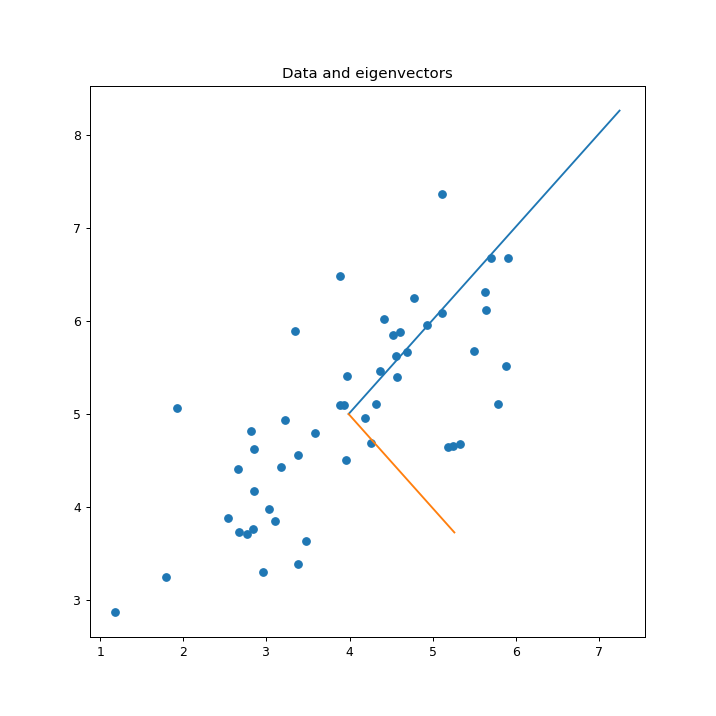

In [6]:
X = data_pct['X']
fig = plt.figure(figsize= (8,8))
ax_ptc = fig.gca()
ax_ptc.scatter(X[:,0],X[:,1])
X, mu, sigma = feature_normalize(X)

u,s,v = pca(X)
scale = 0.5
eig_0 = mu + scale * s[0]*v[:,0].T
eig_1 = mu + scale * s[1]*v[:,1].T

ax_ptc.plot(*zip(eig_0,mu))
ax_ptc.plot(*zip(eig_1,mu))
ax_ptc.set_title('Data and eigenvectors');

In [7]:
data_faces = scipy.io.loadmat('ex7faces')

In [8]:
X = data_faces['X']

<IPython.core.display.Javascript object>


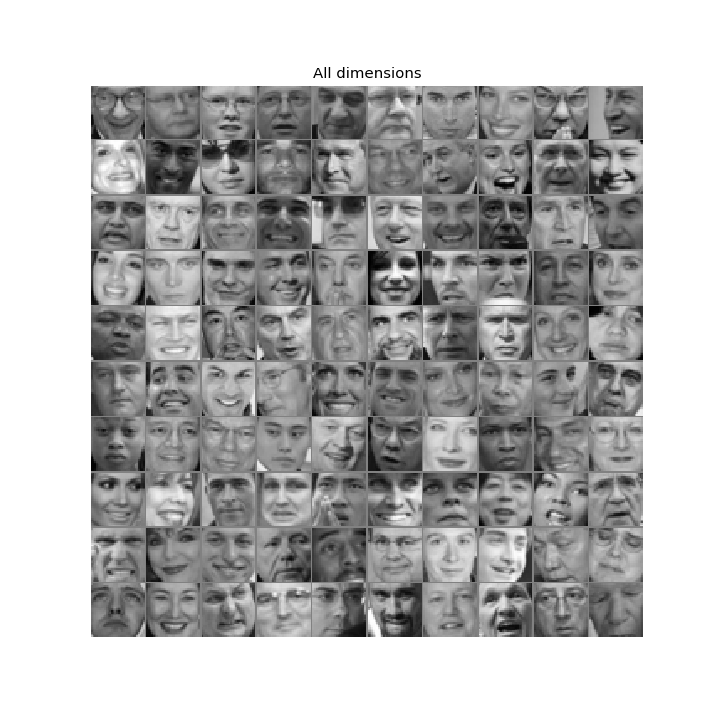

In [9]:
z = plot_pics(X, 10, 32)
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(z, cmap = 'gray')
ax.axis('off')
X_norm, mu, sigma = feature_normalize(X)
ax.set_title('All dimensions');

<IPython.core.display.Javascript object>


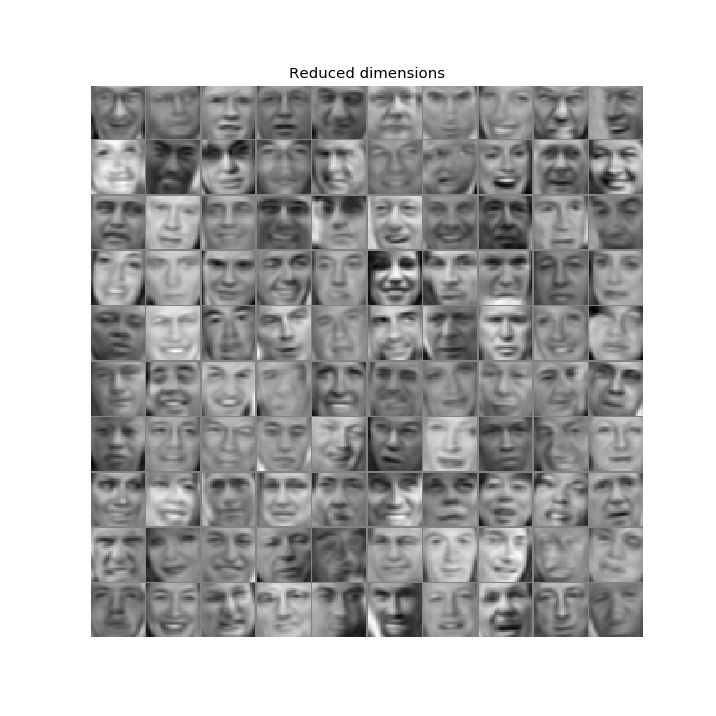

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
u, s, v = pca(X)
k = 100
Z = project_data(X, v, k)
X_rec = recover_data(Z, v, k)
z = plot_pics(X_rec, 10, 32)
ax.axis('off')
ax.imshow(z, cmap = 'gray')
ax.set_title('Reduced dimensions');